# Przedstawienie ilości zgonów oraz obrażeń, które zostały spowodowane przez szybką jazdę oraz w danej dzielnicy

## Wczytanie danych csv

In [2]:
import sqlite3

import pandas as pd
import requests

nypd_df = pd.read_csv("/home/student/nypd-motor-vehicle-collisions.csv")
nypd_df

/tmp/ipykernel_28429/2314116211.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  nypd_df = pd.read_csv("/home/student/nypd-motor-vehicle-collisions.csv")#, usecols=["name", "ingredients"]


,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434.0,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225.0,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002.0,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460.0,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016.0,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612173,2012-07-21T00:00:00.000,22:46,BROOKLYN,11226.0,40.651741,-73.965241,"{'type': 'Point', 'coordinates': [-73.9652409,...",PARADE PLACE,CROOKE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,147595,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
1612174,2012-07-09T00:00:00.000,16:45,NaN,NaN,NaN,NaN,NaN,EDWARD L GRANT HIGHWAY,WEST 169 STREET,NaN,...,Fatigued/Drowsy,Unspecified,NaN,NaN,85220,PASSENGER VEHICLE,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN
1612175,2012-07-09T00:00:00.000,14:35,NaN,NaN,40.791492,-73.935763,"{'type': 'Point', 'coordinates': [-73.935763, ...",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2853431,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1612176,2012-07-18T00:00:00.000,9:20,MANHATTAN,10024.0,40.779479,-73.973573,"{'type': 'Point', 'coordinates': [-73.9735729,...",CENTRAL PARK WEST,WEST 77 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,52405,SPORT UTILITY / STATION WAGON,VAN,BUS,NaN,NaN


##### Wczytanie tabeli ze wszytskimi danymi do analizy przyczyn oraz lokalizacji wypadków w NY

## Wyszukiwanie rekordów zawierające "Unsafe Speed" w kolmnach z niebezpiecznymi czynnikami wypaków

In [5]:
Unsafe_speed_selectes_data = nypd_df[
    (nypd_df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed')
    | (nypd_df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Unsafe Speed')
    | (nypd_df['CONTRIBUTING FACTOR VEHICLE 3'] == 'Unsafe Speed')
    | (nypd_df['CONTRIBUTING FACTOR VEHICLE 4'] == 'Unsafe Speed')
    | (nypd_df['CONTRIBUTING FACTOR VEHICLE 5'] == 'Unsafe Speed')]
Unsafe_speed_selectes_data

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
7,2019-08-11T00:00:00.000,22:23,NaN,NaN,40.858210,-73.916790,"{'type': 'Point', 'coordinates': [-73.91679, 4...",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4187134,Motorcycle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
14,2019-08-12T00:00:00.000,11:20,QUEENS,11420.0,40.678550,-73.814220,"{'type': 'Point', 'coordinates': [-73.81422, 4...",NaN,NaN,125-05 115 AVENUE,...,Unsafe Speed,NaN,NaN,NaN,4187599,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
111,2019-08-09T00:00:00.000,6:00,STATEN ISLAND,10312.0,40.531110,-74.157234,"{'type': 'Point', 'coordinates': [-74.157234, ...",NaN,NaN,4514 HYLAN BOULEVARD,...,Unspecified,NaN,NaN,NaN,4187379,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
190,2019-08-17T00:00:00.000,2:45,NaN,NaN,40.814266,-73.912964,"{'type': 'Point', 'coordinates': [-73.912964, ...",EAST 149 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4191503,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
219,2019-08-30T00:00:00.000,17:15,NaN,NaN,40.866062,-73.922510,"{'type': 'Point', 'coordinates': [-73.92251, 4...",VERMILYEA AVENUE,NaN,NaN,...,Driver Inattention/Distraction,Unspecified,Unspecified,NaN,4200221,Motorcycle,Sedan,Station Wagon/Sport Utility Vehicle,Box Truck,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608816,2012-08-10T00:00:00.000,5:45,BRONX,10461.0,40.838309,-73.828930,"{'type': 'Point', 'coordinates': [-73.82893, 4...",CROSBY AVENUE,WATERBURY AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,88793,OTHER,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
1610213,2012-07-17T00:00:00.000,7:15,BRONX,10455.0,40.813095,-73.898259,"{'type': 'Point', 'coordinates': [-73.8982589,...",BRUCKNER BOULEVARD,LEGGETT AVENUE,NaN,...,NaN,NaN,NaN,NaN,76272,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1610399,2012-07-12T00:00:00.000,12:40,NaN,NaN,NaN,NaN,NaN,BRUCKNER BOULEVARD,EAST 135 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,72670,VAN,SPORT UTILITY / STATION WAGON,SMALL COM VEH(4 TIRES),NaN,NaN
1610625,2012-07-01T00:00:00.000,3:50,MANHATTAN,10014.0,40.733373,-74.002573,"{'type': 'Point', 'coordinates': [-74.0025727,...",GROVE STREET,WEST 4 STREET,NaN,...,Unspecified,NaN,NaN,NaN,9399,VAN,PASSENGER VEHICLE,NaN,NaN,NaN


##### Przedstawienie tabeli, która w czynnikach wypadków ("CONTRIBUTING FACTOR VEHICLE 1/2/3/4/5") zawierała przyczynę wypadku jako nadmierna prędkość ("UNSAFE SPEED")

## Wyznacznie wybranych kolumn z danymi

In [22]:
Unsafe_speed_selectes_data_columns = Unsafe_speed_selectes_data[['BOROUGH','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']]
Unsafe_speed_selectes_data_columns


,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
7,NaN,0.0,1.0,Unsafe Speed,Unspecified,NaN,NaN,NaN
14,QUEENS,1.0,0.0,View Obstructed/Limited,Unsafe Speed,NaN,NaN,NaN
111,STATEN ISLAND,2.0,0.0,Unsafe Speed,Unspecified,NaN,NaN,NaN
190,NaN,2.0,0.0,Unsafe Speed,Unspecified,NaN,NaN,NaN
219,NaN,1.0,0.0,Unsafe Speed,Driver Inattention/Distraction,Unspecified,Unspecified,NaN
...,...,...,...,...,...,...,...,...
1608816,BRONX,0.0,0.0,Unsafe Speed,Unspecified,Unspecified,NaN,NaN
1610213,BRONX,1.0,0.0,Unsafe Speed,NaN,NaN,NaN,NaN
1610399,NaN,0.0,0.0,Unsafe Speed,Unspecified,Unspecified,NaN,NaN
1610625,MANHATTAN,0.0,0.0,Unsafe Speed,Unspecified,NaN,NaN,NaN


##### Przedstawienie wybranych kolumn do analizy, m.in. dzielnica, liczba osób poszkodowanych, liczba osób zabitych, czynniki wypadków dla pojazdu 1,2,3,4,5

## Wypełnianie pustych danych w dzielnicach i zmiana jej nazwy na "UNDEFINIED" 

In [33]:
Unsafe_speed_missing_data = Unsafe_speed_selectes_data_columns.copy()
Unsafe_speed_missing_data['BOROUGH'] = Unsafe_speed_selectes_data_columns['BOROUGH'].fillna('UNDEFINIED')
Unsafe_speed_missing_data

,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
7,Undefinied,0.0,1.0,Unsafe Speed,Unspecified,NaN,NaN,NaN
14,QUEENS,1.0,0.0,View Obstructed/Limited,Unsafe Speed,NaN,NaN,NaN
111,STATEN ISLAND,2.0,0.0,Unsafe Speed,Unspecified,NaN,NaN,NaN
190,Undefinied,2.0,0.0,Unsafe Speed,Unspecified,NaN,NaN,NaN
219,Undefinied,1.0,0.0,Unsafe Speed,Driver Inattention/Distraction,Unspecified,Unspecified,NaN
...,...,...,...,...,...,...,...,...
1608816,BRONX,0.0,0.0,Unsafe Speed,Unspecified,Unspecified,NaN,NaN
1610213,BRONX,1.0,0.0,Unsafe Speed,NaN,NaN,NaN,NaN
1610399,Undefinied,0.0,0.0,Unsafe Speed,Unspecified,Unspecified,NaN,NaN
1610625,MANHATTAN,0.0,0.0,Unsafe Speed,Unspecified,NaN,NaN,NaN


##### Przedstawienie w tabeli brakujących dzielnic ("NaN") jako "Niezdefiniowana" ("Undefinied")

## Zsumowanie danych z ilością osób poszkodowanych i zabitych

In [73]:
sum_data_injured_killed = Unsafe_speed_missing_data.groupby('BOROUGH').agg({"NUMBER OF PERSONS INJURED": "sum", 
                                                        "NUMBER OF PERSONS KILLED": 'sum'})
sum_data_injured_killed

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
BOROUGH,,
BRONX,1103.0,5.0
BROOKLYN,1804.0,19.0
MANHATTAN,491.0,3.0
QUEENS,1470.0,28.0
STATEN ISLAND,279.0,2.0
Undefinied,4932.0,96.0


##### Przedstawienie w tabeli zsumowanej liczby osób zabitych i poszkodowanych dla poszczególnej dzielnicy

## Wizualizacja danych o osobach poszkodowanych i zabitych z podziałem na dzielnice

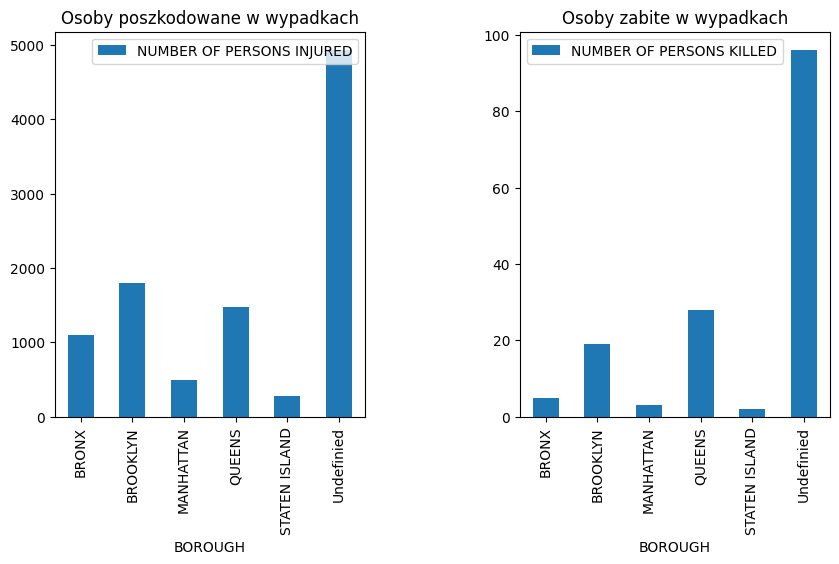

In [80]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sum_data_injured_killed.plot(x='BOROUGH', y='NUMBER OF PERSONS INJURED', kind='bar', ax=axs[0])
axs[0].set_title('Osoby poszkodowane w wypadkach')
sum_data_injured_killed.plot(x='BOROUGH', y='NUMBER OF PERSONS KILLED', kind='bar', ax=axs[1])
axs[1].set_title('Osoby zabite w wypadkach')
plt.subplots_adjust(wspace=0.5)
plt.show()

##### Przedstawienie w formie wykresów liczbę osób zabitych i osób poszkodowanych dla każdej z dzielnic NY

## Suma osób poszkodowanych

In [42]:
sum_data_injured = sum_data_injured_killed
sum_data_injured = sum_data_injured_killed['NUMBER OF PERSONS INJURED'].sum()
sum_data_injured

10079.0

##### Zsumowanie liczby wszystkich osób poszkodowanych w NY

## Suma osób zabitych

In [43]:
sum_data_killed = sum_data_injured_killed
sum_data_killed = sum_data_injured_killed['NUMBER OF PERSONS KILLED'].sum()
sum_data_killed

153.0

##### Zsumowanie liczby wszystkich osób zabitych w NY

# Posumowanie: 

## Na podstawie analizy danych wejściowych, zostały wyznaczone wypadki spowodowane nadmierną prędkością w poszczególnych dzielnicach oraz określona liczba osób poszkodowanych i zabitych w wypadkach. 

## Łączna liczba osób poszkodowana w wypadkach: 10 079
## Łączna liczba osób zabitych w wypadkach: 153